<a href="https://colab.research.google.com/github/ridhanya99/Data-Visualization/blob/main/16PD28_Spot_Assessment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from wordcloud import WordCloud ,STOPWORDS,ImageColorGenerator
import urllib.request  

In [ ]:
speech_data=""
for i in range(1,13):
  url="https://raw.githubusercontent.com/ridhanya99/Data-Visualization/main/Apj_speech_data/apj"+str(i)+".txt"
  print(url)
  for line in urllib.request.urlopen(url):
    speech_data += line.decode('utf-8')


https://raw.githubusercontent.com/ridhanya99/Data-Visualization/main/Apj_speech_data/apj1.txt
https://raw.githubusercontent.com/ridhanya99/Data-Visualization/main/Apj_speech_data/apj2.txt
https://raw.githubusercontent.com/ridhanya99/Data-Visualization/main/Apj_speech_data/apj3.txt
https://raw.githubusercontent.com/ridhanya99/Data-Visualization/main/Apj_speech_data/apj4.txt
https://raw.githubusercontent.com/ridhanya99/Data-Visualization/main/Apj_speech_data/apj5.txt
https://raw.githubusercontent.com/ridhanya99/Data-Visualization/main/Apj_speech_data/apj6.txt
https://raw.githubusercontent.com/ridhanya99/Data-Visualization/main/Apj_speech_data/apj7.txt
https://raw.githubusercontent.com/ridhanya99/Data-Visualization/main/Apj_speech_data/apj8.txt
https://raw.githubusercontent.com/ridhanya99/Data-Visualization/main/Apj_speech_data/apj9.txt
https://raw.githubusercontent.com/ridhanya99/Data-Visualization/main/Apj_speech_data/apj10.txt
https://raw.githubusercontent.com/ridhanya99/Data-Visualiza

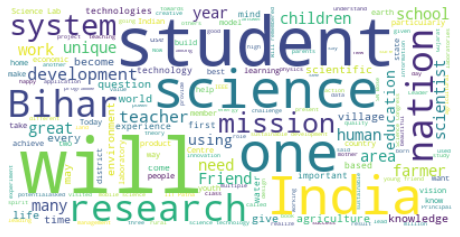

In [ ]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='white', max_words=2000,stopwords=stopwords)
wc.generate(speech_data)

fig = plt.figure()
fig.set_figwidth(8) 
fig.set_figheight(10) 
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show() 

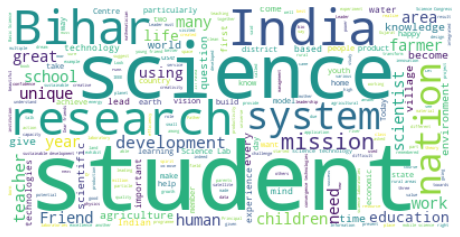

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.add("one")
stopwords.add("may")

wc = WordCloud(background_color='white', max_words=2000,stopwords=stopwords)
wc.generate(speech_data)

fig = plt.figure()
fig.set_figwidth(8) 
fig.set_figheight(10) 
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show() 

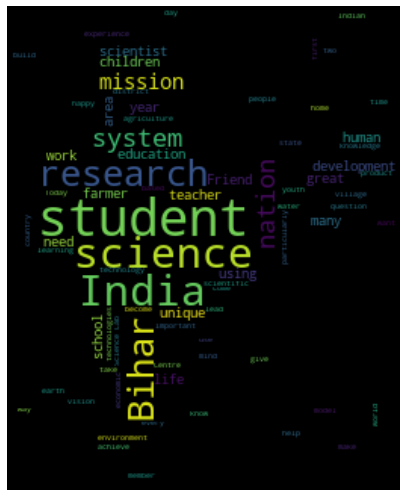

In [ ]:
mask = np.array(PIL.Image.open("/india_map_outline2.jpg"))

stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.add("one")
stopwords.add("may")
wc = WordCloud(background_color='black', mask=mask, mode='RGB', 
              width=1000, max_words=2000, height=1000,
              random_state=1,stopwords=stopwords)

wc.generate(speech_data)
plt.figure(figsize=(7, 7))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

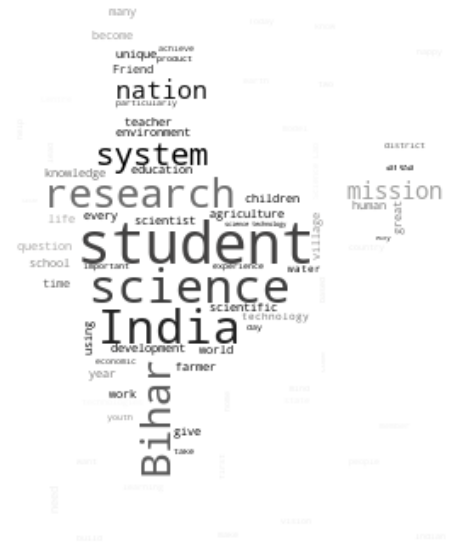

In [ ]:
mask = np.array(PIL.Image.open("/india_map_outline2.jpg"))

stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.add("one")
stopwords.add("may")

wc = WordCloud(background_color="white", mask=mask,stopwords=stopwords)
wc.generate(speech_data)
image_colors = ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Collocations are two or more words that tend to appear frequently together

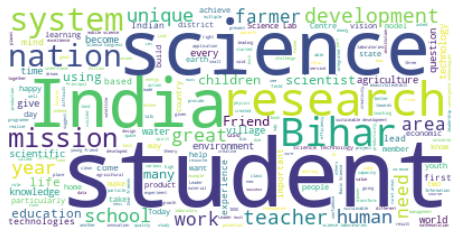

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.add("one")
stopwords.add("may")

wc = WordCloud(background_color='white', max_words=2000,stopwords=stopwords,collocations = True)
wc.generate(speech_data)

fig = plt.figure()
fig.set_figwidth(8) 
fig.set_figheight(10) 
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show() 

In [ ]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [ ]:
tokens = nltk.wordpunct_tokenize(speech_data)

In [ ]:
#bigrams
finder = BigramCollocationFinder.from_words(tokens)
scored = finder.score_ngrams(bigram_measures.raw_freq)
print("No of bigrams")
print(len(sorted(bigram for bigram, score in scored)))
print("\nTop 10 bigrams with frequencies")
#sorted(bigram for bigram, score in scored)[0:10]
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:10]  

No of bigrams
17213

Top 10 bigrams with frequencies


[(('of', 'the'), 164),
 (('.', 'I'), 154),
 (('in', 'the'), 152),
 ((',', 'I'), 112),
 (('.', 'The'), 100),
 (('I', 'am'), 89),
 (('I', 'will'), 80),
 ((',', 'the'), 77),
 (('to', 'the'), 72),
 (('for', 'the'), 65)]

In [ ]:
#Trigrams
finder = TrigramCollocationFinder.from_words(tokens)
scored = finder.score_ngrams(trigram_measures.raw_freq)
#sorted(finder.nbest(trigram_measures.raw_freq, 10))
print("No of trigrams")
print(len(sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))))
print("\nTop 10 trigrams with frequencies")
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:10]  

No of trigrams
24488

Top 10 trigrams with frequencies


[(('.', 'I', 'will'), 42),
 (('would', 'like', 'to'), 38),
 (('I', 'would', 'like'), 32),
 (('.', 'I', 'am'), 31),
 (('be', 'remembered', 'for'), 27),
 (('I', 'am', 'born'), 21),
 (('am', 'born', 'with'), 21),
 (('.', 'A', 'Nation'), 20),
 (('the', 'page', 'of'), 19),
 (('you', 'be', 'remembered'), 19)]

 It is often important to remove low frequency candidates, as we lack sufficient evidence about their significance as collocations

In [ ]:
finder.apply_freq_filter(2)
print("After removing low frequency candidate")
len(sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0])))

After removing low frequency candidate


3893

Remove all trigrams containing personal pronouns from candidature

In [ ]:
finder.apply_word_filter(lambda w: w in ('I', 'me'))
print("After removing all trigrams containing personal pronouns")
print(len(sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))))
print("\nTop 10 trigrams with frequencies after removing personal pronouns")
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:10]  

After removing all trigrams containing personal pronouns
23592

Top 10 trigrams with frequencies after removing personal pronouns


[(('would', 'like', 'to'), 38),
 (('be', 'remembered', 'for'), 27),
 (('am', 'born', 'with'), 21),
 (('.', 'A', 'Nation'), 20),
 (('the', 'page', 'of'), 19),
 (('you', 'be', 'remembered'), 19),
 (('.', 'Friends', ','), 16),
 (('young', 'friends', ','), 16),
 (('.', 'It', 'is'), 15),
 (('A', 'Nation', 'where'), 14)]

#Egonets Facecbook data
https://snap.stanford.edu/data/egonets-Facebook.html

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


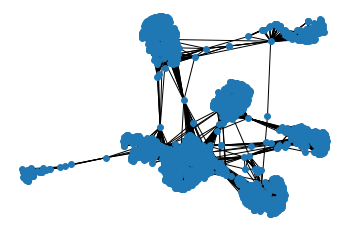

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.read_edgelist("/content/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
print(nx.info(g))

sp = nx.spring_layout(g)
plt.axis('off')
nx.draw_networkx(g,pos=sp,with_labels = False,node_size=35)
plt.show()

(-0.6764081537723541,
 1.0798289597034454,
 -0.636476942896843,
 0.8079829305410385)

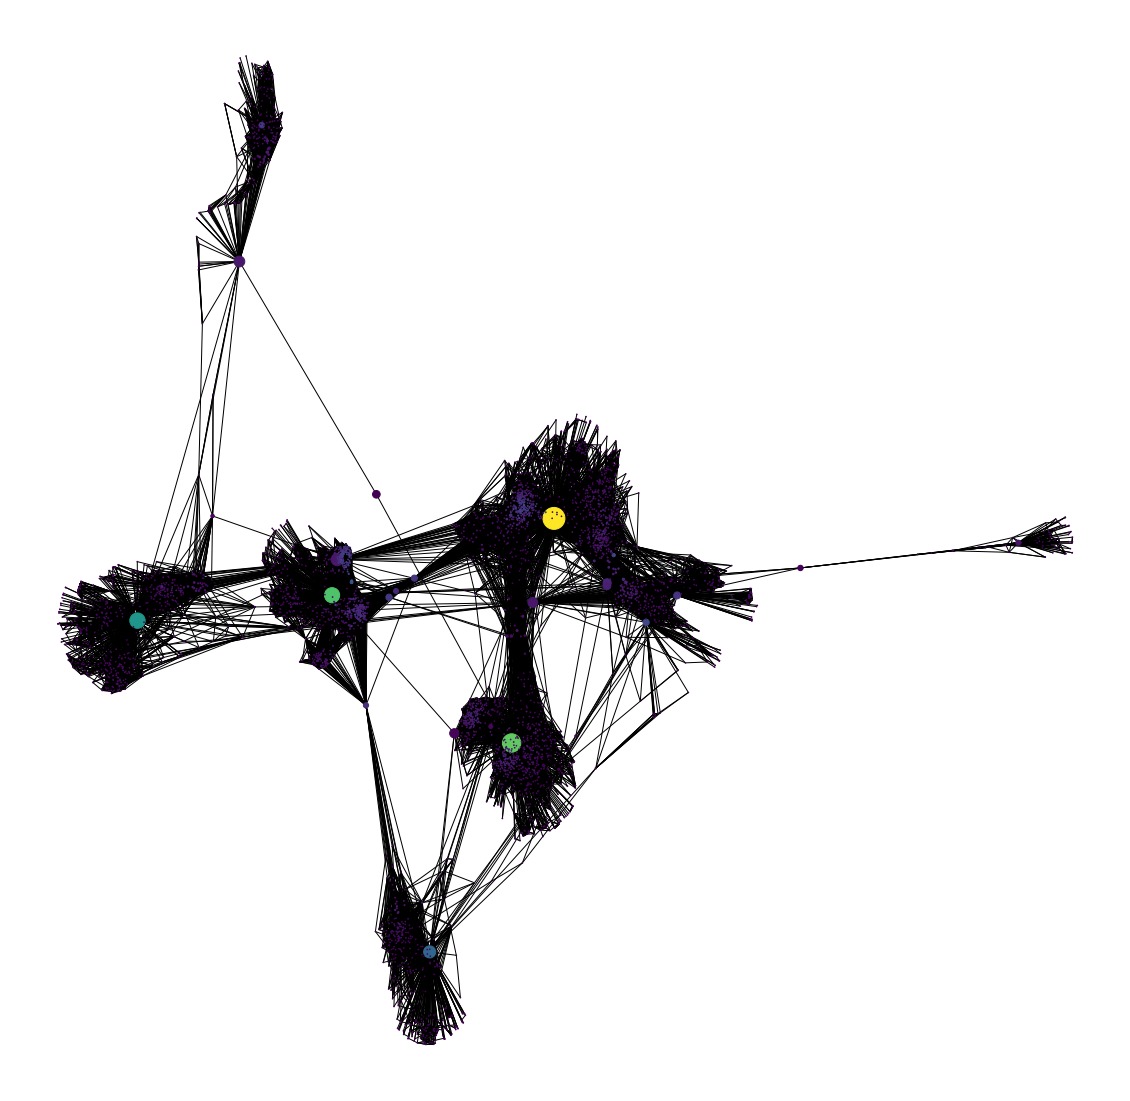

In [ ]:
betCent = nx.betweenness_centrality(g, normalized=True, endpoints=True)
node_color = [20000.0 * g.degree(v) for v in g]
node_size =  [v * 1000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

#Visualize the airports connectivity over the world map layer
world_airports_data


In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
import matplotlib.lines as mlines
from scipy.spatial.distance import squareform, pdist
import math

Data and its Description
https://openflights.org/data.html


In [9]:
def visualization (airport_df, routes_df):
	if (airport_df is None) or (routes_df is None):
		print ("Data cannot be retrieved and read")
	else:
		airport_us = airport_df[(airport_df.Country == "India")]
		us_airport_ix = airport_us.index.values
		routes_us = routes_df[(routes_df['Source Airport ID'].isin(us_airport_ix)) &
		                     (routes_df['Dest Airport ID'].isin(us_airport_ix))] #extract routes that flyies from AND to USA
		routes_us =  pd.DataFrame(routes_us.groupby(['Source Airport', 'Dest Airport']).size().reset_index(name='counts'))
		counts = routes_us['Source Airport'].append(routes_us.loc[routes_us['Source Airport'] != routes_us['Dest Airport'], 'Dest Airport']).value_counts()
		counts = pd.DataFrame({'IATA': counts.index, 'total_flight': counts})
		pos_data = counts.merge(airport_us, on = 'IATA')
	
		# Create graph
		graph = nx.from_pandas_edgelist(routes_us, source = 'Source Airport', target = 'Dest Airport',
		                        edge_attr = 'counts',create_using = nx.DiGraph())

		# Set up base map
		plt.figure(figsize=(10,15))
		m = Basemap(
		        projection='merc',
		        llcrnrlat=0,urcrnrlat=40,llcrnrlon=60,urcrnrlon=95,
		        lat_ts=0,
		        resolution='c')

		m.drawcountries(linewidth = 2)
		m.drawstates(linewidth=3)
		m.drawcoastlines(linewidth=1)
		m.fillcontinents(alpha = 0.5)
    
		m.readshapefile("/content/IND_adm1",'Watersheds')
    # import long lat as m attribute
		mx, my = m(pos_data['Long'].values, pos_data['Lat'].values)
		pos = {}
		for count, elem in enumerate (pos_data['IATA']):
		    pos[elem] = (mx[count], my[count])

		# draw nodes and edges and overly on basemap
		nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] >= 50],
		                       node_color = 'r', alpha = 0.8,
		                       node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] >= 50])

		nx.draw_networkx_labels(G = graph, pos = pos, font_size=10,
		                        labels = {x:x for x in graph.nodes() if counts['total_flight'][x] >= 50})

		nx.draw_networkx_nodes(G = graph, pos = pos, nodelist = [x for x in graph.nodes() if counts['total_flight'][x] < 50],
		                       node_color = 'b', alpha = 0.6,
		                       node_size = [counts['total_flight'][x]*4  for x in graph.nodes() if counts['total_flight'][x] < 50])

		nx.draw_networkx_edges(G = graph, pos = pos, edge_color = 'g', width = routes_us['counts']*0.75, 
		                       alpha=0.06, arrows = False)

		line1 = mlines.Line2D(range(1), range(1), color="white", marker='o', markerfacecolor="red")
		line2 = mlines.Line2D(range(1), range(1), color="white", marker='o',markerfacecolor="blue")
		line3 = mlines.Line2D(range(1), range(1), color="green", marker='',markerfacecolor="green")
		plt.legend((line1, line2, line3), ('Large Airport > 50 routes', 'Smaller airports', 'routes'),
		           loc=4, fontsize = 'x-large')
		plt.title("Network graph of flight routes in INDIA", fontsize = 20)
		#m.bluemarble()
		plt.tight_layout()
		#plt.savefig("./images/networkx_basemap/map_3.png", format = "png", dpi = 300)
		plt.show()
		return 

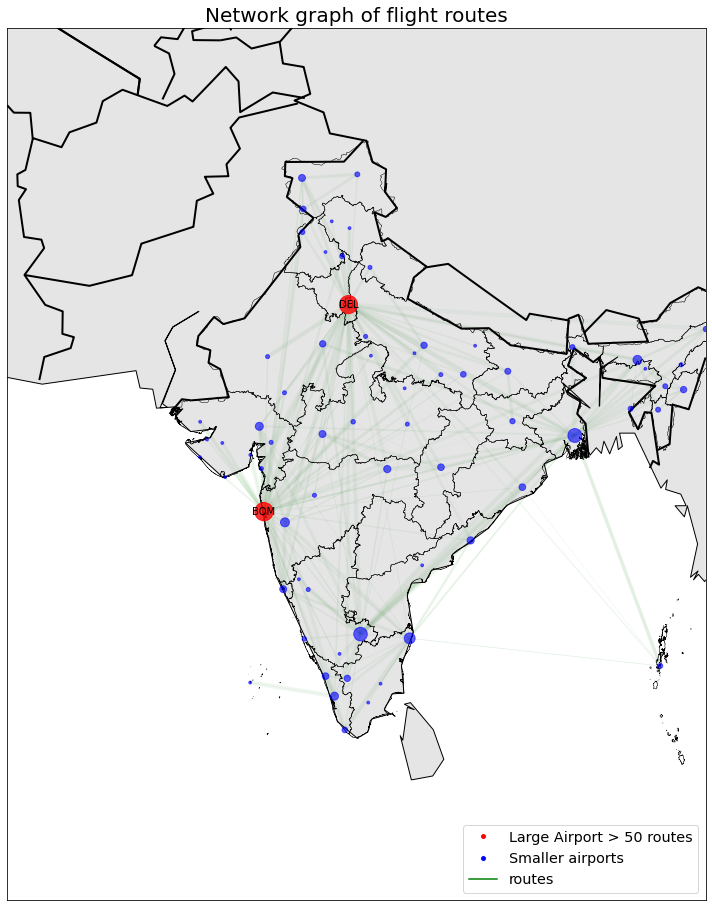

In [10]:
#Airport data
airport_col = ['ID', 'Name', 'City', 'Country','IATA', 'ICAO', 'Lat', 'Long', 'Alt', 'Timezone', 'DST', 'Tz database time zone', 'type', 'source']
airport_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat",names = airport_col, index_col = 0)

#routes Data
route_cols = ['Airline', 'Airline ID', 'Source Airport', 'Source Airport ID','Dest Airport', 'Dest Airport ID', 'Codeshare', 'Stops', 'equipment']
routes_df = pd.read_csv("https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat",names = route_cols)
	
#clean up data, change 'object' type to numeric and drops NaNs
routes_df['Source Airport ID'] = pd.to_numeric(routes_df['Source Airport ID'].astype(str), 'coerce')
routes_df['Dest Airport ID'] = pd.to_numeric(routes_df['Dest Airport ID'].astype(str), 'coerce')
routes_df = routes_df.dropna(subset=["Source Airport ID", "Dest Airport ID"]) 

visualization(airport_df, routes_df)

#Tree Map

https://data.oecd.org/gdp/gross-domestic-product-gdp.htm

In [ ]:
!pip install --upgrade plotly

In [ ]:
import pandas as pd
import urllib
import plotly.express as px

In [ ]:
url = "https://raw.githubusercontent.com/ridhanya99/Data-Visualization/main/countries%20of%20the%20world.csv"
file = urllib.request.urlopen(url)

world_data = pd.read_csv(file)
world_data.head(2)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"


World Population Distribution Color-encoded by GDP Treemap

In [ ]:
fig = px.treemap(world_data,
                 path=['Region', 'Country'],
                 values='Population',
                 color='GDP ($ per capita)',
                 color_continuous_scale='magenta',
                 width=1000, height=600,
                 title="World Population Distribution Color-encoded by GDP",)

fig.show()

In [ ]:
fig = px.treemap(world_data,
                 path=['Region', 'Country'],
                 values='GDP ($ per capita)',
                 color='Population',
                 color_continuous_scale='matter',
                 width=1000, height=600,
                 title="World GDP Distribution Color-encoded by population",)

fig.show()